Vanilla LSTM

In [5]:
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense,LSTM
from datetime import datetime
import sys
import os
import random
import tensorflow as tf

# from read_files import read_files2
from read_files import read_files2

import matplotlib.pyplot as plt

os.environ["PYTHONHASHSEED"] = "0"
os.environ["TF_DETERMINISTIC_OPS"] = "1"
random.seed(1234)
np.random.seed(1234)
tf.random.set_seed(1234)

In [6]:
path = "C:/Users/Vasco/OneDrive - Universidade de Aveiro/Grupo/AIA/" #o teu path
path = "C:/Users/Vasco Costa/OneDrive - Universidade de Aveiro/Grupo/AIA/" #o teu path
path = "/home/miguel/mestrado/2_ano/thesis_logbook/smack/spark/"

product_group_id = 23 #depende da pasta
time_series_folder = 1 #1,2,3

# df_long, df_wide = read_files(path=path, product_group_id=product_group_id, time_series_folder=time_series_folder)

df_long, df_wide = read_files2("/home/miguel/mestrado/2_ano/thesis_smack/data/long_product_group_id_23")
# product_information = pd.read_pickle(path+"Data/product_information")
#print(product_information.loc[product_group_id])
#print(df_wide)
# print(df_wide.columns)

# i = 1
# plt.figure(figsize=(8, 13))
# for col in df_wide.columns:
#     plt.subplot(len(df_wide.columns), 1, i)
#     plt.plot(df_wide[col].values)
#     plt.title(col)
#     i += 1
# plt.subplots_adjust(wspace=0.4,
#                     hspace=1)
# plt.show()

In [7]:
# split a univariate sequence into samples
def split_sequence(sequence, n_steps):
    X, y = list(), list()
    for i in range(len(sequence)):
        # find the end of this pattern
        end_ix = i + n_steps
        # check if we are beyond the sequence
        if end_ix > len(sequence)-1:
            break
        # gather input and output parts of the pattern
        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
        
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X),np.array(y)

In [8]:
methods= ["linear","time","slinear","quadratic","cubic","barycentric",
        "krogh", "from_derivatives", "pchip", "akima", "cubicspline"]
orders = ["polynomial","spline"]
methods += orders
order = 5

method = methods[1]
for name in df_wide.columns:
    if method in orders:
        df_wide.interpolate(option=method,order=order,inplace=True,limit_direction="both")
    else:
        df_wide.interpolate(option=method,inplace=True,limit_direction="both")

# i = 1
# plt.figure(figsize=(8, 13))
# for col in df_wide.columns:
#     plt.subplot(len(df_wide.columns), 1, i)
#     plt.plot(df_wide[col].values)
#     plt.title(col)
#     i += 1
# plt.show()

In [9]:
company = "Abcdin"
#company = "movistar"
raw_seq = df_wide[company]
print(len(raw_seq))
n_steps = 7
X, y = split_sequence(raw_seq, n_steps)
print(X)
percent_train = 0.7
value = int(len(X)*percent_train)
#print(len(X))
X_train = X[:value]
y_train = y[:value]
#print(len(X_train))
X_test = X[value:]
y_test = y[value:]
#print(len(X_test))

[[263.79514236 263.79514236 263.79514236 ... 263.79514236 263.79514236
  263.79514236]
 [263.79514236 263.79514236 263.79514236 ... 263.79514236 263.79514236
  263.79514236]
 [263.79514236 263.79514236 263.79514236 ... 263.79514236 263.79514236
  263.79514236]
 ...
 [181.92486128 181.92486128 181.92486128 ... 181.92486128 181.92486128
  181.92486128]
 [181.92486128 181.92486128 181.92486128 ... 181.92486128 181.92486128
  181.92486128]
 [181.92486128 181.92486128 181.92486128 ... 181.92486128 181.92486128
  181.92486128]]


Vanilla LSTM

In [10]:
n_features = 1
X = X.reshape((X.shape[0],X.shape[1],n_features))

model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(n_steps, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

2023-03-27 14:39:31.827664: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-03-27 14:39:31.827910: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-03-27 14:39:31.827981: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublas.so.11'; dlerror: libcublas.so.11: cannot open shared object file: No such file or directory
2023-03-27 14:39:31.828059: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublasLt.so.11'; dlerror: libcublasLt.so.11: cannot open shared object file: No such file or directory
2023-03-27 14:39:31.828128: W tensorflow/c

In [11]:
history = model.fit(X_train, y_train, epochs=100, batch_size=72, validation_data=(X_test, y_test), verbose=1, shuffle=False)
#  print history
# plt.plot(history.history['loss'])
# plt.plot(history.history['val_loss'])
# plt.title('Loss function')
# plt.legend(['train', 'test'])
# plt.xlabel('iterations')
# plt.show()

Epoch 1/100
7/7 [==============================] - 1s 39ms/step - loss: 58813.5000 - val_loss: 25534.6035
Epoch 2/100
7/7 [==============================] - 0s 8ms/step - loss: 37861.0586 - val_loss: 8410.3027
Epoch 3/100
7/7 [==============================] - 0s 8ms/step - loss: 12628.2266 - val_loss: 3916.9482
Epoch 4/100
7/7 [==============================] - 0s 8ms/step - loss: 4736.9307 - val_loss: 582.6615
Epoch 5/100
7/7 [==============================] - 0s 8ms/step - loss: 337.4563 - val_loss: 76.2978
Epoch 6/100
7/7 [==============================] - 0s 8ms/step - loss: 375.7891 - val_loss: 64.8198
Epoch 7/100
7/7 [==============================] - 0s 8ms/step - loss: 104.0968 - val_loss: 10.6221
Epoch 8/100
7/7 [==============================] - 0s 8ms/step - loss: 108.8168 - val_loss: 10.5703
Epoch 9/100
7/7 [==============================] - 0s 8ms/step - loss: 98.4429 - val_loss: 10.5406
Epoch 10/100
7/7 [==============================] - 0s 8ms/step - loss: 91.1034 - val

7/7 [==============================] - 0s 2ms/step
Test MSE: 9.154


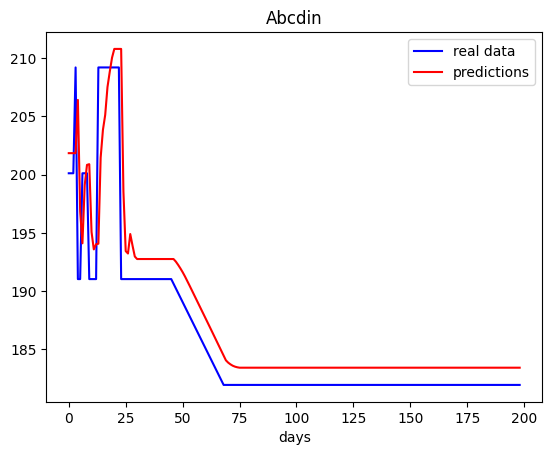

In [12]:
yhat = model.predict(X_test)

with open("jupyter_output.txt", "w") as f:
    for x in yhat:
        f.write(str(x) + "\n")

mse = mean_squared_error(y_test, yhat)
print('Test MSE: %.3f' % mse)

plt.figure()
plt.plot(y_test,color='b', label='real data')
plt.plot(yhat,color='r', label='predictions')
plt.title(company)
plt.xlabel("days")
plt.legend()
plt.show()


In [13]:
# import math
# from keras.callbacks import EarlyStopping

# company = "Abcdin"
# company = "movistar"
# percent_train = 0.7
# n_features = 1
# dic={}

# print(df_wide[company])

# raw_seq = df_wide[company]
# for n_steps in range(1,32):
#     X, y = split_sequence(raw_seq, n_steps)
#     value = int(len(X) * percent_train)
#     X_train = X[:value]
#     y_train = y[:value]
#     X = X.reshape((X.shape[0],X.shape[1],n_features))

#     model = Sequential()
#     model.add(LSTM(50, activation='relu', input_shape=(n_steps, n_features)))
#     model.add(Dense(1))
#     model.compile(optimizer='adam', loss='mse')
#     callback = EarlyStopping(monitor='loss', patience=5)
#     history = model.fit(X_train, y_train, epochs=1000, batch_size=72, verbose=1, shuffle=False,callbacks=[callback])
    
#     yhat = model.predict(X_train)
#     mse = mean_squared_error(y_train, yhat)
#     dic[n_steps] = mse

In [14]:
# n_steps_best = min(dic, key=dic.get)
# X, y = split_sequence(raw_seq, n_steps_best)
# value = int(len(X)*percent_train)
# X_train = X[:value]
# y_train = y[:value]
# X_test = X[value:]
# y_test = y[value:]
# X = X.reshape((X.shape[0],X.shape[1],n_features))
# model = Sequential()
# model.add(LSTM(50, activation='relu', input_shape=(n_steps_best, n_features)))
# model.add(Dense(1))
# model.compile(optimizer='adam', loss='mse')
# callback = EarlyStopping(monitor='loss', patience=10)
# history = model.fit(X_train, y_train, epochs=10000, batch_size=72, validation_data=(X_test, y_test), verbose=1, shuffle=False,callbacks=[callback])

In [15]:
# import statistics
# print(n_steps_best)
# yhat = model.predict(X_train)
# yhat = [item for sublist in yhat for item in sublist]
# print("train")
# print("MAE  : ",sum(yhat - y_train)/len(y_train))
# #MSE
# print("MSE  : ",sum((yhat - y_train)**2)/len(y_train))
# #NRMSE
# print("NRMSE: ",math.sqrt(sum((yhat - y_train)**2)/len(y_train))/(statistics.mean(y_train)) )
# print("test")
# #para o teste
# yhat = model.predict(X_test)

# yhat = [item for sublist in yhat for item in sublist]
# #MAE
# print("MAE  : ",sum(yhat - y_test)/len(y_test))
# #MSE
# print("MSE  : ",sum((yhat - y_test)**2)/len(y_test))
# #NRMSE
# print("NRMSE: ",math.sqrt(sum((yhat - y_test)**2)/len(y_test))/(statistics.mean(y_test)) )

# plt.plot(dic.keys(),dic.values())
# plt.ylabel("MSE")
# plt.xlabel("lag days")
# plt.savefig("lstm_vanilla_"+company+"_lag.png")
# plt.show()

# #  print history
# plt.plot(history.history['loss'])
# plt.plot(history.history['val_loss'])
# plt.title('Loss function')
# plt.legend(['train', 'test'])
# plt.xlabel('iterations')
# plt.savefig("lstm_vanilla_"+company+"_loss.png")
# plt.show()

# plt.figure()
# plt.plot(y_test,color='b', label='real data')
# plt.plot(yhat,color='r', label='predictions')
# plt.legend()
# plt.savefig("lstm_vanilla_"+company+"_test.png")
# plt.show()